In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib notebook
pi=np.pi

<IPython.core.display.Javascript object>


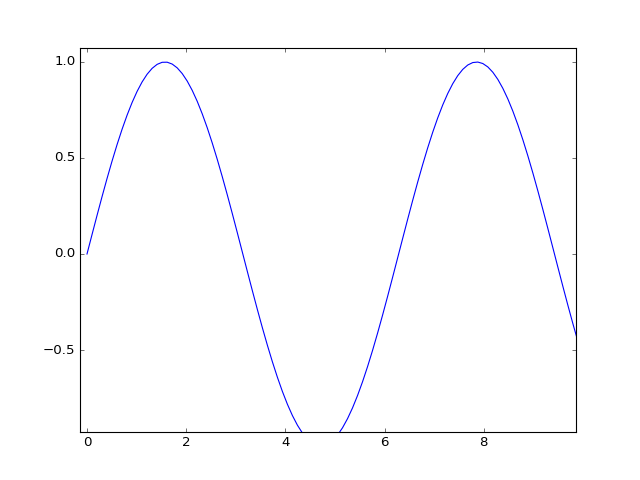

In [2]:
x=np.linspace(0,10,100)
plt.plot(x, np.sin(x))

### Sanity check for Quspin: static

In [2]:
L=1

#H= -sigma_z^1  

basis = spin_basis_1d(L,pauli=True)

jz_index=[[1,i] for i in xrange(0,L)]

static=[['z',jz_index]]


dynamic=[]
H=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)
print 'basis printing-- \n', basis
print 'Ham-- \n', H

Hermiticity check passed!
Symmetry checks passed!
basis printing-- 
reference states: 
         0.  |0>
         1.  |1>
see review arXiv:1101.3281 for more details about reference states for symmetry reduced blocks.

Ham-- 
static mat: 
  (0, 0)	(-1+0j)
  (1, 1)	(1+0j)


dynamic:



In [3]:
L=2
#H= sigma_z^1+ sigma_z^2  


jz_index=[[1,i] for i in xrange(0,L)]

static=[['z',jz_index]]


dynamic=[]
basis = spin_basis_1d(L,pauli=True)
H=hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)

print 'basis printing-- \n', basis
print 'Ham-- \n', H

Hermiticity check passed!
Symmetry checks passed!
basis printing-- 
reference states: 
         0.  |0 0>
         1.  |1 0>
         2.  |0 1>
         3.  |1 1>
see review arXiv:1101.3281 for more details about reference states for symmetry reduced blocks.

Ham-- 
static mat: 
  (0, 0)	(-2+0j)
  (3, 3)	(2+0j)


dynamic:



I now understand how to define static Hamiltonian. Let me understand how to use this code for dynamic part

### Sanity check for QuSpin: dynamic
$H=\sigma_z + t \sigma_x$ . At time =0, $H=\sigma_z$. At time =1, $H=\sigma_z+ \sigma_x$


In [4]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
L=1 # system size
Jxy=1.0 # xy interaction
Jzz_0=1.0 # zz interaction at time t=0
v = 1.0 # declare ramp speed variable

def ramp(t):
	return t
ramp_args=[]

basis = spin_basis_1d(L)

J_z = [[1.0,i] for i in range(L)] # OBC
# static and dynamic lists
static = [["z",J_z]]
dynamic =[["x",J_z,ramp,ramp_args]]
# compute the time-dependent Heisenberg Hamiltonian
H_simple = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)

Hermiticity check passed!
Symmetry checks passed!


In [181]:
print 'time=0 \n', H_simple(time=0.0)
print 'time=1 \n', H_simple(time=1.0)

time=0 
  (0, 0)	(-1+0j)
  (1, 1)	(1+0j)
time=1 
  (0, 0)	(-1+0j)
  (0, 1)	(1+0j)
  (1, 0)	(1+0j)
  (1, 1)	(1+0j)


In [182]:
E0,V0= H_simple.eigh(time=0)
E1,V1= H_simple.eigh(time=1)

In [195]:
##checking that I am picking up the right vector
print "E_0 \n", E0
print "vec GS \n", V0[:,0]
print "H.v \n" , H_simple(time=0).dot(V0[:,0])
print "(v^T H.v) \n" , (H_simple(time=0).dot(V0[:,0])).dot(V0[:,0])

E_0 
[-1.  1.]
vec GS 
[-1.+0.j  0.+0.j]
H.v 
[ 1.+0.j  0.+0.j]
(v^T H.v) 
(-1+0j)


In [36]:
print E1

[-1.41421356  1.41421356]


In [40]:
print V1

[[-0.92387953+0.j  0.38268343+0.j]
 [ 0.38268343+0.j  0.92387953+0.j]]


In [52]:
#checking eigenvectors
print 0.92387953/0.38268343  # found by solving eigenvalue equation
print (np.sqrt(2)+1)/(np.sqrt(4+ 2*np.sqrt(2))), 1.0/(np.sqrt(4+ 2*np.sqrt(2))) #normalization condn

2.41421357073
0.923879532511 0.382683432365


So far, I have learnt that I can write Hamiltonian, diagonalize to obtain eigenvalues ang eigenvectors at any time I want.
I still have to learn how to evolve and how to give initial condition. Let me setup Dries hamiltonian first.

### Dries Hamiltonian: Ising spin chain with tranverse and longitudinal fields
$\begin{equation}
H_0=\sum J \sigma_j^z \sigma_{j+1}^z + \sum  (Z_j  \sigma_j^z +X_j  \sigma_j^x)
\end{equation} $
+ Here we choose $J=1, Z_j=2, X_j=0.8$
+ Driven Bare Hamiltonian is $H_0 + \lambda \sigma_0^x$
+ CD one spin Hamiltonian is $\dot{\lambda} \alpha_0 \sigma_0^y$

In [197]:
L=2# system size


basis = spin_basis_1d(L)
# static 
J_z = [[1.0,i,(i+1)%L] for i in range(L)] # PBC
Z = [[2.0,i] for i in range(L)] 
X = [[0.8,i] for i in range(L)]
static = [["zz",J_z], ["z",Z], ["x",X]]

#dynamic var
def ramp(t):
    return t
ramp_args=[]
s=np.zeros(L)
s[0]=1
J_x_t = [[s[j],j] for j in range(L-1) ]

dynamic =[["x", J_x_t,ramp,ramp_args]]
# compute the time-dependent Heisenberg Hamiltonian
H0 = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)
print J_z,'\n', Z, '\n', X
print "Ham \n", H0

Hermiticity check passed!
Symmetry checks passed!
[[1.0, 0, 1], [1.0, 1, 0]] 
[[2.0, 0], [2.0, 1]] 
[[0.8, 0], [0.8, 1]]
Ham 
static mat: 
  (0, 0)	(-2+0j)
  (0, 1)	(0.8+0j)
  (0, 2)	(0.8+0j)
  (1, 0)	(0.8+0j)
  (1, 1)	(-2+0j)
  (1, 3)	(0.8+0j)
  (2, 0)	(0.8+0j)
  (2, 2)	(-2+0j)
  (2, 3)	(0.8+0j)
  (3, 1)	(0.8+0j)
  (3, 2)	(0.8+0j)
  (3, 3)	(6+0j)


dynamic:
0) func: ramp, func_args: (), mat: 
  (0, 1)	(1+0j)
  (1, 0)	(1+0j)
  (2, 3)	(1+0j)
  (3, 2)	(1+0j) 



In [198]:
E0,V0=H0.eigh(time=0)

In [206]:
##checking that I am picking up the right vector corresponding to evalue
print "E_0 \n", E0
print "vec GS \n", V0[:,3]
print "H.v =evalue *v \n" , H0(time=0).dot(V0[:,3])
print "evalue=(v^T. H.v) \n" , (H0(time=0).dot(V0[:,3])).dot(V0[:,3])

E_0 
[-3.20304829 -2.         -0.95689024  6.15993853]
vec GS 
[ 0.01940384+0.j  0.09895883+0.j  0.09895883+0.j  0.98996858+0.j]
H.v =evalue *v 
[ 0.11952645+0.j  0.60958028+0.j  0.60958028+0.j  6.09814561+0.j]
evalue=(v^T. H.v) 
(6.15993853153+0j)


In [216]:
##intial state is ground state
psi0=V0[:,0]

In [217]:
## evolving using SE
tf=5
psi = H0.evolve(psi0,0.0,tf)

In [218]:
### computing fidelity and final energy above the ground state
def fidelity(t):
    psi = H0.evolve(psi0,0.0,t)
    psi_gs=H0(time=t)
    return np.dot
### figure out how to define fidelity using vdot (or dot)
### here lamba=t. But in reality, it is some sin**2 fn. Import it from sympy